# SSDS5. Unsupervised
 - 


In [1]:
import findspark
findspark.init()

In [19]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .master("yarn") \
        .appName("ssds") \
        .getOrCreate()
sc = spark.sparkContext

## Denedrogram

In [151]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
# plt.rc('font', family='NanumGothic')

In [76]:
import seaborn as sns
sns.set(color_codes=True)

iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

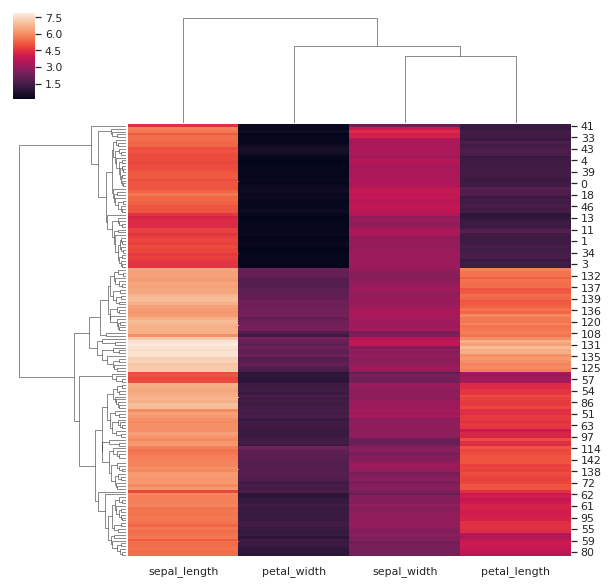

In [79]:
# 레이블 제거
species = iris.pop("species")
g = sns.clustermap(iris)

In [88]:
# rgb 컬러는 각 종을 나타냄
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris, row_colors=row_colors)

### iris data
 - change linkage
 - change mettric

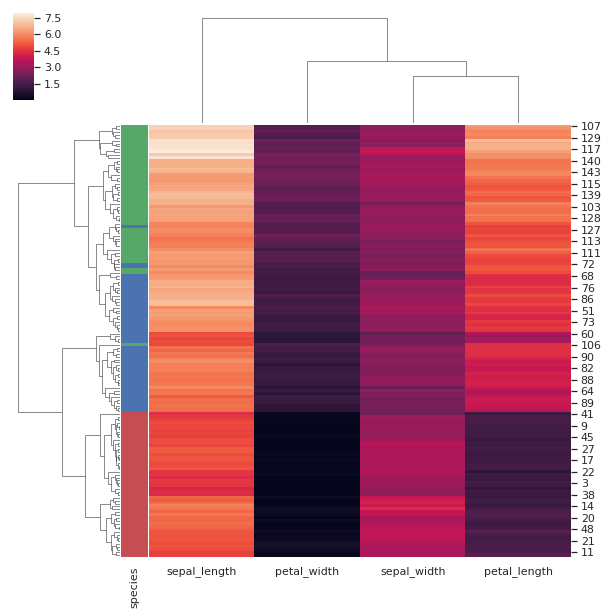

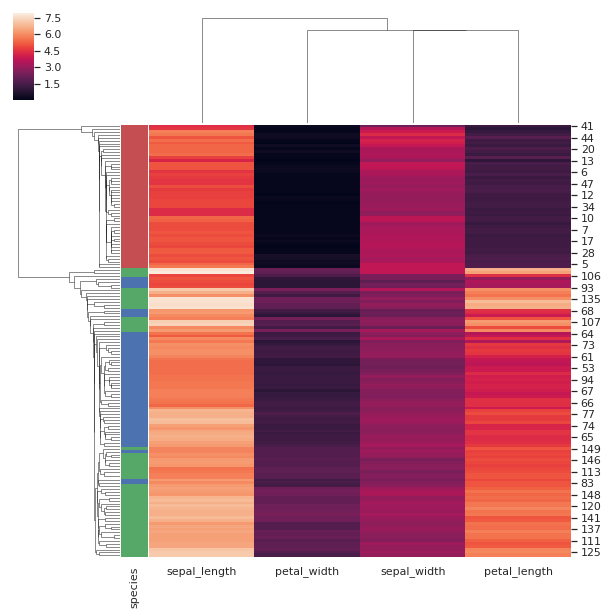

In [101]:
# use 'complete', 'single' linkage
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris, row_colors=row_colors, method='complete')

g = sns.clustermap(iris, row_colors=row_colors, method='single')

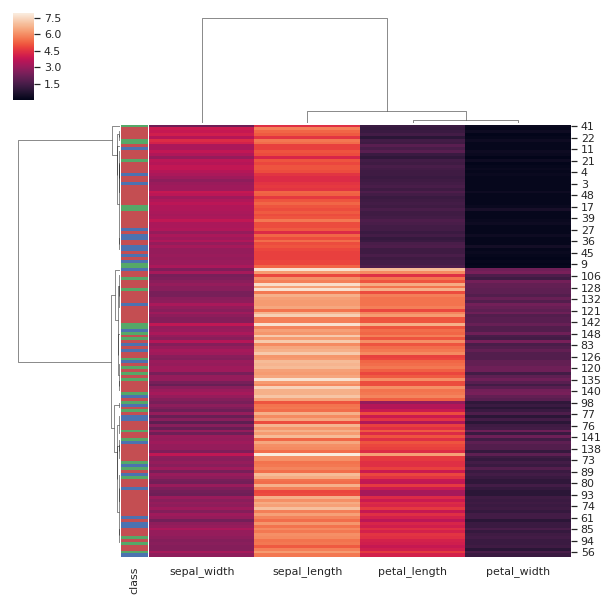

In [138]:
# 
g = sns.clustermap(iris, row_colors=row_colors, metric='correlation')

### 서울시 2018년 4월 미세먼지 일별/구별 데이터

In [129]:
# Load location data
df_mise = spark.read.option("header", "true") \
                    .option("nullValue", "?") \
                    .option("inferSchema", "true") \
                    .csv('s3://ssds2/mise04.csv')

df_mise.show()

+----+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|   구|2018-04-01|2018-04-02|2018-04-03|2018-04-04|2018-04-05|2018-04-06|2018-04-07|2018-04-08|2018-04-09|2018-04-10|2018-04-11|2018-04-12|2018-04-13|2018-04-14|2018-04-15|2018-04-16|2018-04-17|2018-04-18|2018-04-19|2018-04-20|2018-04-21|2018-04-22|2018-04-23|2018-04-24|2018-04-25|2018-04-26|2018-04-27|2018-04-28|2018-04-29|2018-04-30|
+----+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-

In [132]:
mise = df_mise.toPandas()
mise.head()

구  2018-04-01  2018-04-02  2018-04-03  2018-04-04  2018-04-05  \
0  종로구          27          24          17           5           4   
1   중구          28          22          16           6           5   
2  용산구          40          33          25           8           4   
3  성동구          43          35          26           9           6   
4  광진구          31          24          18           6           4   

   2018-04-06  2018-04-07  2018-04-08  2018-04-09  ...  2018-04-21  \
0          21          20          13          22  ...          35   
1          19          19          12          24  ...          36   
2          32          26          17          29  ...          43   
3          30          27          17          23  ...          51   
4          21          21          13          21  ...          38   

   2018-04-22  2018-04-23  2018-04-24  2018-04-25  2018-04-26  2018-04-27  \
0          18           6           4        22.0          26          34   
1          18           6           5        21.0          27          36   
2          20           5           4        26.0          30          42   
3          27           8           4         NaN          38          42   
4          18           5           5        22.0          27          34   

   2018-04-28  2018-04-29  2018-04-30  
0          34          28          47  
1          36          29          50  
2          42          34          58  
3          44          38          69  
4          38          29          50  

[5 rows x 31 columns]

In [161]:
mise2 = mise.set_index('구').fillna(mise.median())
mise2.head()

2018-04-01  2018-04-02  2018-04-03  2018-04-04  2018-04-05  2018-04-06  \
구                                                                             
종로구          27          24          17           5           4          21   
중구           28          22          16           6           5          19   
용산구          40          33          25           8           4          32   
성동구          43          35          26           9           6          30   
광진구          31          24          18           6           4          21   

     2018-04-07  2018-04-08  2018-04-09  2018-04-10  ...  2018-04-21  \
구                                                    ...               
종로구          20          13          22          18  ...          35   
중구           19          12          24          18  ...          36   
용산구          26          17          29          21  ...          43   
성동구          27          17          23          21  ...          51   
광진구          21          13          21          18  ...          38   

     2018-04-22  2018-04-23  2018-04-24  2018-04-25  2018-04-26  2018-04-27  \
구                                                                             
종로구          18           6           4        22.0          26          34   
중구           18           6           5        21.0          27          36   
용산구          20           5           4        26.0          30          42   
성동구          27           8           4        23.0          38          42   
광진구          18           5           5        22.0          27          34   

     2018-04-28  2018-04-29  2018-04-30  
구                                        
종로구          34          28          47  
중구           36          29          50  
용산구          42          34          58  
성동구          44          38          69  
광진구          38          29          50  

[5 rows x 30 columns]

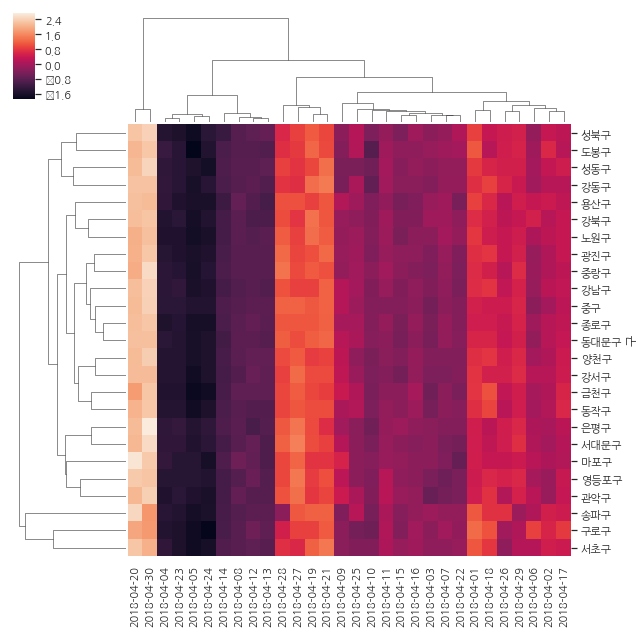

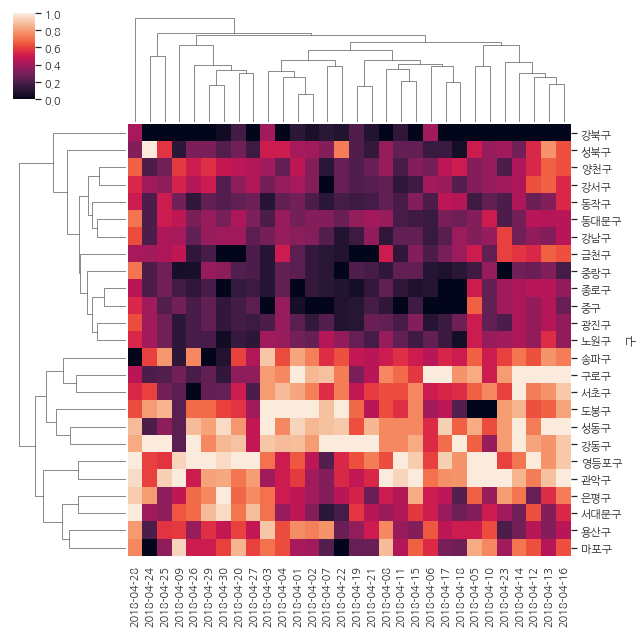

In [159]:
# Normalize the data within the rows
g = sns.clustermap(mise2, z_score=0)

# Standardize the data within the columns
g = sns.clustermap(mise2, standard_scale=1)

In [248]:
df_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               8.9             0.120         0.45            1.80      0.075   
1               5.6             0.190         0.46            1.10      0.032   
2               6.0             0.260         0.32            3.50      0.028   
3               6.2             0.250         0.38            7.90      0.045   
4               7.0             0.620         0.18            1.50      0.062   
5               7.4             0.410         0.66           10.80      0.051   
6               7.3             0.260         0.33           17.85      0.049   
7               6.7             0.240         0.46            2.20      0.033   
8               8.1             0.530         0.22            2.20      0.078   
9               6.2             0.700         0.15            5.10      0.076   
10              7.1             0.340         0.49            1.50      0.027   
11              7.2             0.835         0.00            2.00      0.166   
12              7.4             0.240         0.26            1.60      0.058   
13             11.6             0.410         0.54            1.50      0.095   
14              7.8             0.590         0.18            2.30      0.076   
15              6.5             0.220         0.34           12.00      0.053   
16              5.7             0.210         0.25            1.10      0.035   
17              6.9             0.450         0.27            4.70      0.035   
18              6.0             0.140         0.17            5.60      0.036   
19              7.7             0.180         0.53            1.20      0.041   
20              7.5             0.380         0.29           12.70      0.050   
21              7.4             0.380         0.34            8.30      0.052   
22              5.1             0.520         0.06            2.70      0.052   
23             10.5             0.590         0.49            2.10      0.070   
24              8.3             0.850         0.14            2.50      0.093   
25              7.8             0.550         0.00            1.70      0.070   
26              6.3             0.130         0.42            1.10      0.043   
27              8.3             0.300         0.36           10.00      0.042   
28              7.3             0.170         0.24            8.10      0.121   
29              9.0             0.290         0.34           12.10      0.030   
...             ...               ...          ...             ...        ...   
6467            7.8             0.630         0.48            1.70      0.100   
6468            7.9             0.300         0.68            8.30      0.050   
6469            5.6             0.180         0.31            1.50      0.038   
6470            7.2             0.620         0.01            2.30      0.065   
6471            7.1             0.260         0.49            2.20      0.032   
6472            6.3             0.190         0.21            1.80      0.049   
6473            8.2             0.420         0.49            2.60      0.084   
6474            8.3             0.610         0.30            2.10      0.084   
6475            7.0             0.290         0.49            3.80      0.047   
6476            6.8             0.250         0.29            2.00      0.042   
6477            9.1             0.270         0.32            1.10      0.031   
6478            7.3             0.260         0.36            5.20      0.040   
6479            9.2             0.360         0.34            1.60      0.062   
6480            7.2             0.260         0.44            7.10      0.027   
6481            6.2             0.250         0.39            1.30      0.051   
6482            8.8             0.400         0.40            2.20      0.079   
6483            6.5             0.270         0.19            6.60      0.045   
6484            6.5             0.220

## K-means (Anomaly Detection in Network Traffic)

In [26]:
dataWithoutHeader = spark.read.option('inferSchema', 'true') \
                            .option('header', 'false') \
                            .csv('s3://ssds2/kddcup.data_10_percent_corrected')
# 10% sampling dataser --> 500k rows

data = dataWithoutHeader.toDF(
    "duration", "protocol_type", "service", "flag",
    "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
    "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count",
    "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "label")

# 총 23종류의 레이블 존재
data.select("label")\
    .groupBy("label")\
    .count()\
    .orderBy("count", ascending=False)\
    .show(10)

+------------+------+
|       label| count|
+------------+------+
|      smurf.|280790|
|    neptune.|107201|
|     normal.| 97278|
|       back.|  2203|
|      satan.|  1589|
|    ipsweep.|  1247|
|  portsweep.|  1040|
|warezclient.|  1020|
|   teardrop.|   979|
|        pod.|   264|
+------------+------+
only showing top 10 rows



In [51]:
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.feature import VectorAssembler

# use only numeric column
# numericOnly = data.drop("protocol_type", "service", "flag").cache()
numericOnly = data.drop("protocol_type", "service", "flag").dropna().cache()

In [52]:
cols = numericOnly.columns.copy()
cols.remove("label")

assembler = VectorAssembler() \
    .setInputCols(cols)\
    .setOutputCol("featureVector")

kmeans = KMeans() \
    .setPredictionCol("cluster") \
    .setFeaturesCol("featureVector")

In [53]:
%%time
pipeline = Pipeline().setStages([assembler, kmeans])
pipelineModel = pipeline.fit(numericOnly)
kmeansModel = pipelineModel.stages[-1]

kmeansModel.clusterCenters() # k=2

CPU times: user 26.9 ms, sys: 8.99 ms, total: 35.9 ms
Wall time: 3.01 s


In [54]:
withCluster = pipelineModel.transform(numericOnly)

withCluster.select("cluster", "label") \
    .groupBy("cluster", "label").count() \
    .orderBy(["cluster", "count"], ascending=[1, 0]) \
    .show(50)

# 전부 한 클러스터로 수렴

+-------+----------------+------+
|cluster|           label| count|
+-------+----------------+------+
|      0|          smurf.|280790|
|      0|        neptune.|107201|
|      0|         normal.| 97278|
|      0|           back.|  2203|
|      0|          satan.|  1589|
|      0|        ipsweep.|  1247|
|      0|      portsweep.|  1039|
|      0|    warezclient.|  1020|
|      0|       teardrop.|   979|
|      0|            pod.|   264|
|      0|           nmap.|   231|
|      0|   guess_passwd.|    53|
|      0|buffer_overflow.|    30|
|      0|           land.|    21|
|      0|    warezmaster.|    20|
|      0|           imap.|    12|
|      0|        rootkit.|    10|
|      0|     loadmodule.|     9|
|      0|      ftp_write.|     8|
|      0|       multihop.|     7|
|      0|            phf.|     4|
|      0|           perl.|     3|
|      0|            spy.|     2|
|      1|      portsweep.|     1|
+-------+----------------+------+



### Choosing K

In [61]:
def clusteringScore0(data, k): # (data: DataFrame, k: Int): Double 
    cols = data.columns.copy()
    cols.remove("label")

    assembler = VectorAssembler() \
        .setInputCols(cols) \
        .setOutputCol("featureVector")
        
    kmeans = KMeans() \
        .setSeed(777) \
        .setK(k) \
        .setPredictionCol("cluster") \
        .setFeaturesCol("featureVector")
    
    pipeline = Pipeline().setStages([assembler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return kmeansModel.computeCost(pipelineModel.transform(data)) / data.count()

In [62]:
scores0 = map(lambda x: (x, clusteringScore0(numericOnly, x)) ,range(20, 161, 20))
list(scores0)

[(20, 49288208.04814216),
 (40, 38899804.39739159),
 (60, 39905350.14207225),
 (80, 39538231.62763587),
 (100, 37247473.94950207),
 (120, 31350145.58417596),
 (140, 15025164.226189326),
 (160, 11490373.5353644)]

In [63]:
# Increase max iter and decrease tolerancre
# default value: tol=0.0001, maxIter=20 
def clusteringScore1(data, k): # (data: DataFrame, k: Int): Double 
    cols = data.columns.copy()
    cols.remove("label")

    assembler = VectorAssembler() \
        .setInputCols(cols) \
        .setOutputCol("featureVector")
        
    # maxIter-default: 20, tol-default: 0.0001
    kmeans = KMeans() \
        .setSeed(777) \
        .setK(k) \
        .setMaxIter(50) \
        .setTol(1.0e-5) \
        .setPredictionCol("cluster") \
        .setFeaturesCol("featureVector")
    
    pipeline = Pipeline().setStages([assembler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return kmeansModel.computeCost(pipelineModel.transform(data)) / data.count()

In [64]:
scores1 = map(lambda x: (x, clusteringScore1(numericOnly, x)) ,range(20, 161, 20))
list(scores1)

[(20, 49288208.04814216),
 (40, 38899804.39739159),
 (60, 39905350.14207225),
 (80, 39537855.903115645),
 (100, 37247317.02977557),
 (120, 31350145.58417596),
 (140, 10790530.281291507),
 (160, 7255739.590456693)]

### Feature Normalization

In [65]:
# feature normalization
from pyspark.ml.feature import StandardScaler

def clusteringScore2(data, k): #def clusteringScore2(data: DataFrame, k: Int): Double = {
    cols = data.columns.copy()
    cols.remove("label")

    assembler = VectorAssembler() \
        .setInputCols(cols) \
        .setOutputCol("featureVector")
    
    scaler = StandardScaler() \
        .setInputCol("featureVector") \
        .setOutputCol("scaledFeatureVector") \
        .setWithStd(True) \
        .setWithMean(False)
        
    kmeans = KMeans() \
        .setSeed(777) \
        .setK(k) \
        .setMaxIter(40) \
        .setTol(1.0e-5) \
        .setPredictionCol("cluster") \
        .setFeaturesCol("scaledFeatureVector")
    
    pipeline = Pipeline().setStages([assembler, scaler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return kmeansModel.computeCost(pipelineModel.transform(data)) / data.count()

In [66]:
scores2 = map(lambda x: (x, clusteringScore2(numericOnly, x)) ,range(20, 161, 20))
list(scores2)

[(20, 7.774506864536316),
 (40, 1.885219315582293),
 (60, 1.172611128142208),
 (80, 0.8205257728547283),
 (100, 0.577027972631291),
 (120, 0.5128711683158498),
 (140, 0.4113301686666121),
 (160, 0.33969642493192925)]

### Categorical Variables

In [171]:
# OneHotEncoderEstimator example
from pyspark.ml.feature import OneHotEncoderEstimator

df = spark.createDataFrame([
    (0.0, 1.0),
    (1.0, 0.0),
    (2.0, 1.0),
    (0.0, 2.0),
    (0.0, 1.0),
    (2.0, 0.0)
], ["categoryIndex1", "categoryIndex2"])

encoder = OneHotEncoderEstimator(inputCols=["categoryIndex1", "categoryIndex2"],
                                 outputCols=["categoryVec1", "categoryVec2"])
model = encoder.fit(df)
encoded = model.transform(df)
encoded.show()

+--------------+--------------+-------------+-------------+
|categoryIndex1|categoryIndex2| categoryVec1| categoryVec2|
+--------------+--------------+-------------+-------------+
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           1.0|           0.0|(2,[1],[1.0])|(2,[0],[1.0])|
|           2.0|           1.0|    (2,[],[])|(2,[1],[1.0])|
|           0.0|           2.0|(2,[0],[1.0])|    (2,[],[])|
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           2.0|           0.0|    (2,[],[])|(2,[0],[1.0])|
+--------------+--------------+-------------+-------------+



In [167]:
# process categorical column
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer

def oneHotPipeline(inputCol): # (inputCol: String): (Pipeline, String)
    indexer = StringIndexer(inputCol=inputCol, outputCol=inputCol+"_indexed")   
    encoder = OneHotEncoderEstimator(inputCols=[inputCol+"_indexed"], outputCols=[inputCol+"_vec"])

    pipeline = Pipeline().setStages([indexer, encoder])
    return (pipeline, inputCol + "_vec")

In [168]:
def make_one_hot_df(data):
    (protoTypeEncoder, protoTypeVecCol) = oneHotPipeline("protocol_type")
    (serviceEncoder, serviceVecCol) = oneHotPipeline("service")
    (flagEncoder, flagVecCol) = oneHotPipeline("flag")
    
    pipeline = Pipeline().setStages([protoTypeEncoder, serviceEncoder, flagEncoder])
    return pipeline.fit(data).transform(data)

In [169]:
def clusteringScore3(data, k): # data: DataFrame, k: Int): Double = {
       
    cols = data.columns.copy()
    for c in ["protocol_type", "service", "flag", "protocol_type_indexed", "service_indexed", "flag_indexed", "label"]:
        cols.remove(c)
    cols.extend(["protocol_type_vec", "service_vec", "flag_vec"])

    assembler = VectorAssembler() \
        .setInputCols(cols) \
        .setOutputCol("featureVector")
    
    scaler = StandardScaler() \
        .setInputCol("featureVector") \
        .setOutputCol("scaledFeatureVector") \
        .setWithStd(True) \
        .setWithMean(False)
        
    kmeans = KMeans() \
        .setSeed(777) \
        .setK(k) \
        .setMaxIter(40) \
        .setTol(1.0e-5) \
        .setPredictionCol("cluster") \
        .setFeaturesCol("scaledFeatureVector")
    
    pipeline = Pipeline().setStages([assembler, scaler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return kmeansModel.computeCost(pipelineModel.transform(data)) / data.count()

In [170]:
data_one_hot = make_one_hot_df(data)
scores3 = map(lambda x: (x, clusteringScore3(data_one_hot, x)), range(20, 161, 20))
list(scores3)

[(20, 131.4717110363194),
 (40, 89.0988129008651),
 (60, 53.378521862844615),
 (80, 28.516299563500745),
 (100, 7.084463861212428),
 (120, 3.8091161360506103),
 (140, 2.606509088548695),
 (160, 2.209933163644792)]

### Using Labels with Entropy

In [173]:
import math
#  Calc entropy
def calc_each_entropy(v, n):
    p = v/n
    return -p*math.log(p)

def entropy(counts): # (counts: iterable[int]): Double
    values = [x for x in counts if x > 0]
    n = sum(map(float, values))
    entropys = map(lambda v: calc_each_entropy(v, n), values)
    return sum(entropys)

In [174]:
def fitPipeline4(data, k):
    (protoTypeEncoder, protoTypeVecCol) = oneHotPipeline("protocol_type")
    (serviceEncoder, serviceVecCol) = oneHotPipeline("service")
    (flagEncoder, flagVecCol) = oneHotPipeline("flag")

    inputCols = data.columns.copy()
    for c in ["protocol_type", "service", "flag", "label"]:
        inputCols.remove(c)
    inputCols.extend(["protocol_type_vec", "service_vec", "flag_vec"])

    assembler = VectorAssembler() \
        .setInputCols(inputCols) \
        .setOutputCol("featureVector")
    
    scaler = StandardScaler() \
        .setInputCol("featureVector") \
        .setOutputCol("scaledFeatureVector") \
        .setWithStd(True) \
        .setWithMean(False)
        
    kmeans = KMeans() \
        .setSeed(42) \
        .setK(k) \
        .setMaxIter(40) \
        .setTol(1.0e-5) \
        .setPredictionCol("cluster") \
        .setFeaturesCol("scaledFeatureVector")
    
    pipeline = Pipeline().setStages([protoTypeEncoder, serviceEncoder, flagEncoder, assembler, scaler, kmeans])
    return pipeline.fit(data)  

In [175]:
from collections import Counter

def clusteringScore4(data, k): # (data: DataFrame, k: Int): Double 
    pipelineModel = fitPipeline4(data, k)

    clusterLabel = pipelineModel.transform(data).select(["cluster", "label"])
    labels_grouped = clusterLabel.rdd.groupByKey()
    labels_counted = labels_grouped.map(lambda x: (x[0], len(x[1]), list(Counter(x[1]).values())))
    weightedClusterEntropy = labels_counted.map(lambda x: x[1]*entropy((x[2])))

    # Average entropy weighted by cluster size 
    return sum(weightedClusterEntropy.collect())/data.count()

In [178]:
scores4 = map(lambda x: (x, clusteringScore4(data, x)), range(20, 161, 20))
list(scores4)

[(20, 0.1170720587119054),
 (40, 0.21244532921089265),
 (60, 0.16371008256363703),
 (80, 0.07537979705798675),
 (100, 0.06966798357254919),
 (120, 0.03992643158163492),
 (140, 0.04084865677867837),
 (160, 0.023312158228116896)]

---
##  조교 실습용(시간이 남는다면)

In [183]:
# 결과가 모두 다를거고 여기선 k=80이 최적이라는 가정하에 계산
pipelineModel = fitPipeline4(data, 80)
countByClusterLabel = pipelineModel.transform(data) \
    .select("cluster", "label") \
    .groupBy("cluster", "label").count() \
    .orderBy(["cluster", "label"])
countByClusterLabel.show(200)

+-------+----------------+------+
|cluster|           label| count|
+-------+----------------+------+
|      0|        ipsweep.|     4|
|      0|           nmap.|     1|
|      0|         normal.|   354|
|      0|            pod.|    96|
|      0|      portsweep.|     1|
|      0|          satan.|    14|
|      0|          smurf.|280790|
|      1|        ipsweep.|     1|
|      1|        neptune.|   107|
|      1|      portsweep.|     2|
|      2|        ipsweep.|    14|
|      2|        neptune.| 19464|
|      2|         normal.|  5332|
|      2|      portsweep.|    48|
|      3|        neptune.|    91|
|      3|      portsweep.|     1|
|      4|        ipsweep.|     3|
|      4|        neptune.|   112|
|      4|      portsweep.|     1|
|      4|          satan.|     1|
|      5|          satan.|     1|
|      6|      portsweep.|   161|
|      6|          satan.|  1391|
|      7|         normal.|  1168|
|      7|          satan.|    20|
|      8|        neptune.|    98|
|      8|     

In [192]:
kMeansModel = pipelineModel.stages[-1]
centroids = kMeansModel.clusterCenters()
clustered = pipelineModel.transform(data).cache()

In [217]:
# 기존 코드가 너무 시간이 오래걸려서 변경
%%time
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf, col
import numpy as np

def sqdist(a,b):
    a = centroids[a]
    return float(np.sqrt(np.sum((a-b)**2, axis=0)))

sqdist_udf = udf(sqdist, FloatType())

# 시간 오래 걸리므로 반드시 캐시
clustered_dist = clustered.select("cluster", "label", "scaledFeatureVector")\
    .withColumn('sqdist', sqdist_udf(col('cluster'), col('scaledFeatureVector')))\
    .cache()
    
thresholds = clustered_dist.orderBy('sqdist', ascending=False).take(100)

threshold = thresholds[-1]
print(threshold)

Row(cluster=11, label='neptune.', scaledFeatureVector=SparseVector(115, {19: 0.7741, 20: 0.0893, 21: 2.6266, 22: 2.6246, 25: 0.3349, 26: 0.6082, 28: 3.9385, 29: 0.2075, 30: 0.2191, 31: 0.4576, 34: 2.6275, 35: 2.6252, 39: 2.0554, 97: 72.1194, 106: 2.6252}), sqdist=72.09322357177734)
CPU times: user 167 ms, sys: 66.2 ms, total: 233 ms
Wall time: 18min 12s


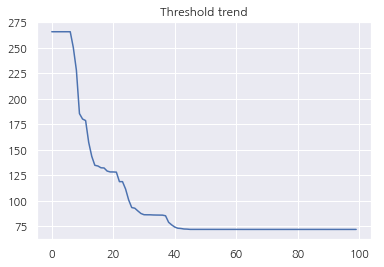

In [220]:
th = [i[-1] for i in  thresholds]
plt.plot(th)
plt.title('Threshold trend')
plt.show()

In [219]:
%%time
anomalies = clustered_dist.filter(col('sqdist') >= threshold.sqdist)
anomalies.select("cluster", "label").groupBy('label') \
    .count().orderBy("count", ascending=False).show()

+-------------+-----+
|        label|count|
+-------------+-----+
|     neptune.|   54|
|      normal.|   26|
|         pod.|    5|
|        perl.|    3|
|  loadmodule.|    2|
|   portsweep.|    2|
|   ftp_write.|    2|
|    multihop.|    2|
|guess_passwd.|    1|
|     ipsweep.|    1|
|       satan.|    1|
|     rootkit.|    1|
|         spy.|    1|
+-------------+-----+

CPU times: user 48 ms, sys: 84.9 ms, total: 133 ms
Wall time: 1.55 s


In [185]:
"""import numpy as np
def sqdist(a,b):
    return float(np.sqrt(np.sum((a-b)**2, axis=0)))
    
thresholds = clustered.select("cluster", "scaledFeatureVector").rdd \
    .map(lambda x: sqdist(centroids[x[0]], np.array(x[1])))\
    .sortBy(lambda x: x, ascending=False)\
    .take(100)1
threshold = thresholds[-1]
threshold"""

KeyboardInterrupt: 

In [ ]:
"""anomalies = clustered.select("cluster", "scaledFeatureVector", "label").rdd \
    .filter(lambda x: sqdist(centroids[x[0]], np.array(x[1])) >= threshold).toDF()
anomalies.select("cluster", "label").groupBy('label') \
    .count().orderBy("count", ascending=False).show()"""

## Gaussian Mixture Model (GMM)

In [10]:
from pyspark.ml.clustering import GaussianMixture

# loads data
dataset = spark.read.format("libsvm").load("data/mllib/sample_kmeans_data.txt")

gmm = GaussianMixture().setK(2).setSeed(777)
model = gmm.fit(dataset)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+-------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean                                                         |cov                                                                                                                                                                                                     |
+-------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.10000000000001552,0.10000000000001552,0.10000000000001552]|0.006666666666806454  0.006666666666806454  0.006666666666806454  
0.006666666666806454  0.006666666666806454

In [11]:
dataset.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|           (3,[],[])|
|  1.0|(3,[0,1,2],[0.1,0...|
|  2.0|(3,[0,1,2],[0.2,0...|
|  3.0|(3,[0,1,2],[9.0,9...|
|  4.0|(3,[0,1,2],[9.1,9...|
|  5.0|(3,[0,1,2],[9.2,9...|
+-----+--------------------+



---
## PCA

In [403]:
from pyspark.ml.feature import PCA
wine = spark.read.option('inferSchema', 'true') \
                            .option('header', 'true') \
                            .csv('s3://ssds2/wine.csv')

wine.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|label|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+
|          8.9|            0.12|       0.45|           1.8|    0.075|               10.0|                21.0|0.99552|3.41|     0.76|   11.9|      7|    0|
|          5.6|            0.19|       0.46|           1.1|    0.032|               33.0|               115.0| 0.9909|3.36|      0.5|   10.4|      6|    1|
|          6.0|            0.26|       0.32|           3.5|    0.028|               29.0|               113.0| 0.9912| 3.4|     0.71|   12.3|      7|    1|
|          6.2|            0.25|       0.38|           7.9|    0

In [414]:
from pyspark.ml.feature import PCA

# remove label column
cols = wine.columns
cols.remove('label')
# cols.remove('quality')


# make feature vector
assembler = VectorAssembler() \
    .setInputCols(cols)\
    .setOutputCol("features")

# scale feature vector
standardScaler = StandardScaler()\
    .setWithMean(True)\
    .setWithStd(True)\
    .setInputCol("features")\
    .setOutputCol("features_scaled")

pca = PCA(k=2, inputCol="features_scaled", outputCol="pca_features")

pipeline = Pipeline(stages=[assembler, standardScaler, pca])
pipelineModel = pipeline.fit(wine)

In [415]:
wine_pca = pipelineModel.transform(wine)
wine_pca.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+--------------------+--------------------+--------------------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|label|            features|     features_scaled|        pca_features|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+--------------------+--------------------+--------------------+
|          8.9|            0.12|       0.45|           1.8|    0.075|               10.0|                21.0|0.99552|3.41|     0.76|   11.9|      7|    0|[8.9,0.12,0.45,1....|[1.29948246492746...|[-2.0577767488676...|
|          5.6|            0.19|       0.46|           1.1|    0.032|               33.0|               115.0| 0.9909|3.36| 

In [416]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    return udf(to_array_, ArrayType(DoubleType()))(col)

df_wine = wine_pca.withColumn("pca", to_array(col("pca_features")))\
                    .select(["label","quality"] + [col("pca")[i] for i in range(2)])\
                    .toPandas()

In [417]:
df_wine.head()

label  quality    pca[0]    pca[1]
0      0        7 -2.057777 -0.984942
1      1        6  0.817884 -1.651968
2      1        7  0.036338 -2.491674
3      1        5  2.236543  1.303567
4      0        5 -2.194082  0.477332

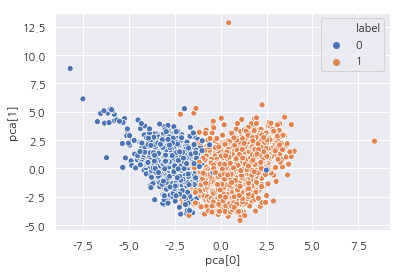

In [422]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

ax = sns.scatterplot(x='pca[0]', y='pca[1]', hue='label', data=df_wine)

In [423]:
# Returns a vector of proportions of variance explained by each principal component.
pcaModel = pipelineModel.stages[-1]
pcaModel.explainedVariance.toArray()

array([0.25346226, 0.22082117])

In [424]:
# Returns a principal components Matrix. Each column is one principal component.
list(zip(pcaModel.pc.toArray(), cols))

[(array([-0.25692873,  0.26184306]), 'fixed acidity'),
 (array([-0.39493118,  0.10519825]), 'volatile acidity'),
 (array([0.14646061, 0.14409348]), 'citric acid'),
 (array([0.31890519, 0.34258497]), 'residual sugar'),
 (array([-0.31344994,  0.2697701 ]), 'chlorides'),
 (array([0.42269137, 0.11117878]), 'free sulfur dioxide'),
 (array([0.47441968, 0.14394753]), 'total sulfur dioxide'),
 (array([-0.09243753,  0.55492047]), 'density'),
 (array([-0.20806957, -0.15292185]), 'pH'),
 (array([-0.29985192,  0.1196342 ]), 'sulphates'),
 (array([-0.05892408, -0.49272747]), 'alcohol'),
 (array([ 0.08747571, -0.29660091]), 'quality')]

In [425]:
# https://analyticsdefined.com/implementing-principal-component-analysis/
def biplot(data, reduced_data, model):
    
    fig, ax = plt.subplots(figsize = (14,10))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'pca[0]'], y=reduced_data.loc[:, 'pca[1]'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = model.pc.toArray()

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

original_data = wine.toPandas().drop(['label'], axis=1)
biplot(original_data, df_wine, pcaModel)

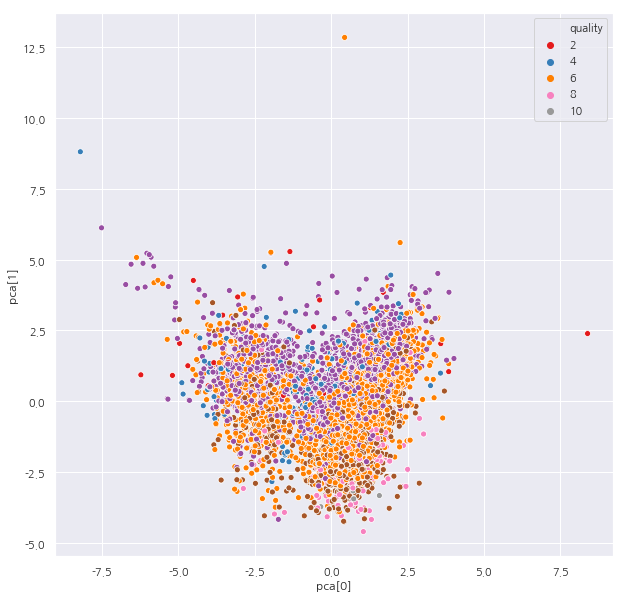

In [426]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x='pca[0]', y='pca[1]', hue='quality', data=df_wine, palette="Set1")

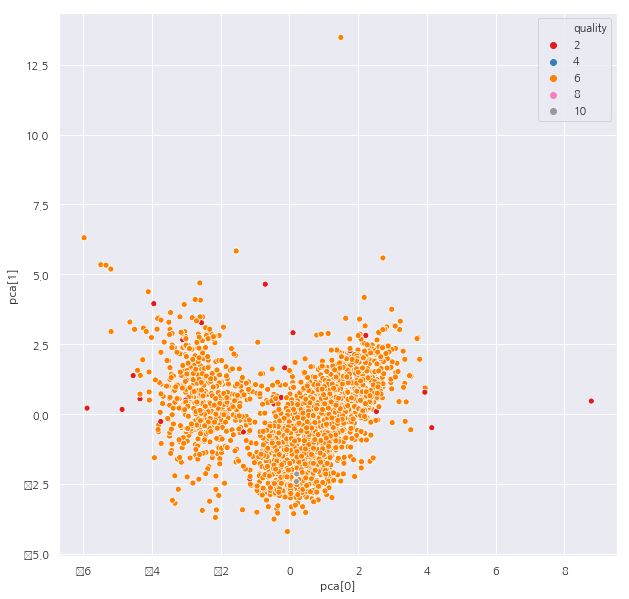

In [413]:
# quality 3의 배수만 본 것
plt.figure(figsize=(10, 10))
df_wine_selected = df_wine[df_wine['quality']%3 == 0]
ax = sns.scatterplot(x='pca[0]', y='pca[1]', hue='quality', data=df_wine_selected, palette="Set1")

---
## wine clustering

In [427]:
wine.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|label|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+
|          8.9|            0.12|       0.45|           1.8|    0.075|               10.0|                21.0|0.99552|3.41|     0.76|   11.9|      7|    0|
|          5.6|            0.19|       0.46|           1.1|    0.032|               33.0|               115.0| 0.9909|3.36|      0.5|   10.4|      6|    1|
|          6.0|            0.26|       0.32|           3.5|    0.028|               29.0|               113.0| 0.9912| 3.4|     0.71|   12.3|      7|    1|
|          6.2|            0.25|       0.38|           7.9|    0

In [428]:
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

def clusteringWineScore(data, k): #def clusteringScore2(data: DataFrame, k: Int): Double = {
    cols = data.columns.copy()
    cols.remove("label")
    cols.remove("quality")

    assembler = VectorAssembler() \
        .setInputCols(cols) \
        .setOutputCol("featureVector")
    
    scaler = StandardScaler() \
        .setInputCol("featureVector") \
        .setOutputCol("scaledFeatureVector") \
        .setWithStd(True) \
        .setWithMean(False)
        
    kmeans = KMeans() \
        .setSeed(777) \
        .setK(k) \
        .setMaxIter(40) \
        .setTol(1.0e-5) \
        .setPredictionCol("cluster") \
        .setFeaturesCol("scaledFeatureVector")
    
    pipeline = Pipeline().setStages([assembler, scaler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return kmeansModel.computeCost(pipelineModel.transform(data)) / data.count()

In [431]:
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

def clusteringWine(data, k): #def clusteringScore2(data: DataFrame, k: Int): Double = {
    cols = data.columns.copy()
    cols.remove("label")
    cols.remove("quality")

    assembler = VectorAssembler() \
        .setInputCols(cols) \
        .setOutputCol("featureVector")
    
    scaler = StandardScaler() \
        .setInputCol("featureVector") \
        .setOutputCol("scaledFeatureVector") \
        .setWithStd(True) \
        .setWithMean(False)
        
    kmeans = KMeans() \
        .setSeed(777) \
        .setK(k) \
        .setMaxIter(40) \
        .setTol(1.0e-5) \
        .setPredictionCol("cluster") \
        .setFeaturesCol("scaledFeatureVector")
    
    pipeline = Pipeline().setStages([assembler, scaler, kmeans])
    pipelineModel = pipeline.fit(data)
    kmeansModel = pipelineModel.stages[-1]
    return pipelineModel.transform(data)

In [451]:
thresholds = map(lambda x: (x, clusteringWineScore(wine, x)) ,range(2, 25, 2))
thresholds = list(thresholds)
print(thresholds)

[(2, 8.640185910861451), (4, 6.595623900765373), (6, 5.51440252109003), (8, 5.249321673281931), (10, 4.734418760916352), (12, 4.463918753470894), (14, 4.185464235164448), (16, 4.085249264165105), (18, 3.9151272212476695), (20, 3.7387728556343522), (22, 3.66163929479487), (24, 3.5302377019117626)]


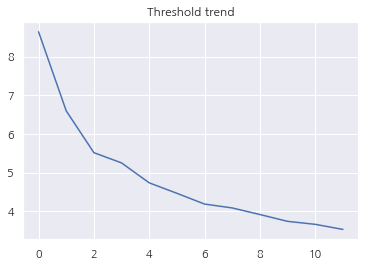

In [452]:
th = [i[-1] for i in thresholds]
plt.plot(th)
plt.title('Threshold trend')
plt.show()

In [453]:
wine_clusted = clusteringWine(wine, 6)

In [454]:
from pyspark.ml.feature import PCA

# remove label column
cols = wine.columns
cols.remove('label')
# cols.remove('quality')


# make feature vector
assembler = VectorAssembler() \
    .setInputCols(cols)\
    .setOutputCol("features")

# scale feature vector
standardScaler = StandardScaler()\
    .setWithMean(True)\
    .setWithStd(True)\
    .setInputCol("features")\
    .setOutputCol("features_scaled")

pca = PCA(k=2, inputCol="features_scaled", outputCol="pca_features")

pipeline = Pipeline(stages=[assembler, standardScaler, pca])
pipelineModel = pipeline.fit(wine)

In [455]:
wine_clusted

DataFrame[fixed acidity: double, volatile acidity: double, citric acid: double, residual sugar: double, chlorides: double, free sulfur dioxide: double, total sulfur dioxide: double, density: double, pH: double, sulphates: double, alcohol: double, quality: int, label: int, featureVector: vector, scaledFeatureVector: vector, cluster: int]

In [456]:
wine_pca = pipelineModel.transform(wine_clusted)
wine_pca.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+--------------------+--------------------+-------+--------------------+--------------------+--------------------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|label|       featureVector| scaledFeatureVector|cluster|            features|     features_scaled|        pca_features|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+-----+--------------------+--------------------+-------+--------------------+--------------------+--------------------+
|          8.9|            0.12|       0.45|           1.8|    0.075|               10.0|                21.0|0.99552|3.41|     0.76|   11.9|      7|    0|[8.9,0.12,0.45,1....|[6.86498631068064

In [457]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    return udf(to_array_, ArrayType(DoubleType()))(col)

df_wine = wine_pca.withColumn("pca", to_array(col("pca_features")))\
                    .select(["label","quality", "cluster"] + [col("pca")[i] for i in range(2)])\
                    .toPandas()

In [458]:
df_wine.head()

label  quality  cluster    pca[0]    pca[1]
0      0        7        1 -2.057777 -0.984942
1      1        6        0  0.817884 -1.651968
2      1        7        5  0.036338 -2.491674
3      1        5        2  2.236543  1.303567
4      0        5        3 -2.194082  0.477332

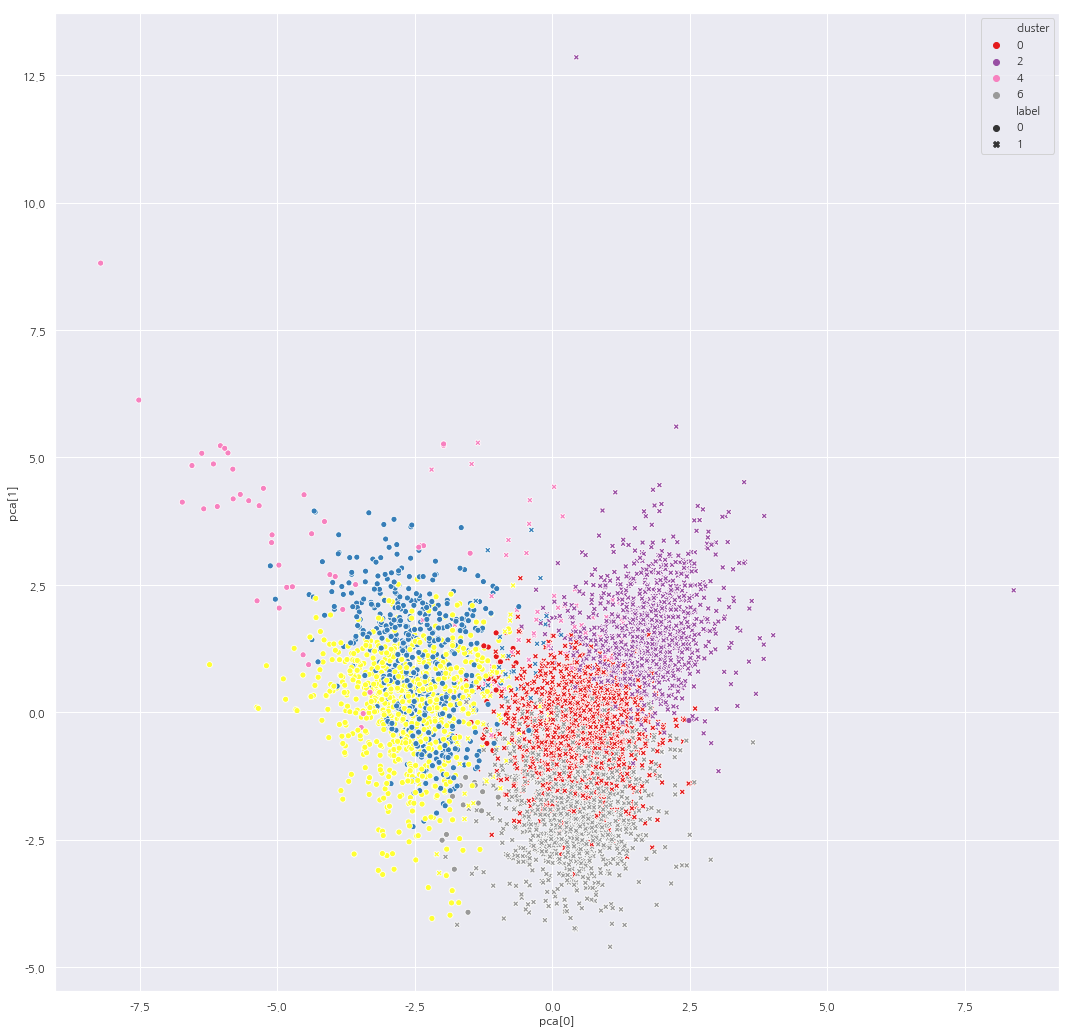

In [459]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl

plt.figure(figsize=(18, 18))
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

ax = sns.scatterplot(x='pca[0]', y='pca[1]', hue='cluster', style='label', data=df_wine,  palette="Set1")